In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
%matplotlib inline

In [2]:
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

In [13]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
from perceptron import Perceptron

In [153]:
class Perceptron():
    def __init__(self,data,epochs = 25,learning_rate = 0.01,verbose = False):
        self.d = data.shape[1]-1
        self.x = np.array(data.iloc[:,:self.d])
        self.y = np.array(data.iloc[:,self.d])
        self.epoch = epochs
        self.len_data = data.shape[0]
        self.eta = learning_rate
        self.verbose = verbose
    def one_epoch(self,w):
        flag = 0
        lst = list(range(self.len_data))
        random.shuffle(lst)
        for j in range(self.len_data):
            m = lst.pop()
            if w@self.x[m]<0:
                s = -1
            else:
                s = 1
            delta = (self.y[m] - s)
            if delta==0:
                flag+=1
            w += (self.eta)*(delta/2)*self.x[m]
        return(w,flag)
    def train(self):
        w = np.ones(self.d)
        for i in range(self.epoch):
            result = self.one_epoch(w)
            w = result[0]
            if (self.verbose==True):
                print("No. of correctly classified data points in "+str(i)+"th epoch : ", result[1])
            if result[1] == self.len_data:
                break
        if (self.verbose==True):
            print("Convergence reached in "+str(i)+" epochs")
        self.W = w
        #return(self.W)
    def Y(self,m,c,xRange):
        return(m*xRange+c)
    
    def plot_decision_region(self, name, savefig = False):
        x1Max = max(np.array(self.x[:,1]))+0.5
        x1Min = min(np.array(self.x[:,1]))-0.5
        x2Max = max(np.array(self.x[:,2]))+0.5
        x2Min = min(np.array(self.x[:,2]))-0.5
        color_list = ["palevioletred","royalblue"]
        xx, yy = np.meshgrid(np.arange(x1Min, x1Max, .02), np.arange(x2Min, x2Max, .02))
        z = self.predict(np.c_[np.ones(xx.ravel().shape),xx.ravel(),yy.ravel()])
        z = z.reshape(xx.shape)
        plt.contourf(xx, yy, z, colors= color_list, alpha=0.1)
        plt.contour(xx, yy, z, colors=color_list, alpha=.1)
        plt.scatter(self.x[:,1],self.x[:,2], c=[color_list[j] for j in self.y==1.])
        #plt.plot(np.linspace(x1Min,x1Max),self.Y(-self.W[1]/self.W[2],-self.W[0]/self.W[2],np.linspace(x1Min,x1Max)),label = "Decision Region")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.title("Decision region plot for the " + name + " data points")
        #plt.legend()
        if savefig == True:
            plt.savefig(name+"dec_reg_perceptron.png")
        plt.show()
        
    def predict(self,mat):
        return(np.sign(mat @ self.W))
    def accuracy(self,test_data):
        prediction = self.predict(test_data.iloc[:,:self.d])
        compare = prediction == test_data.iloc[:,self.d]
        return(np.sum(compare)/len(test_data))
    
    def confusionMatrix(self, dat, name, save_fig = False):
        prediction = self.predict(dat.iloc[:,:self.d])
        conf_mat = confusion_matrix(dat.iloc[:,self.d],prediction)
        plt.figure()
        sns.heatmap(conf_mat, annot=True)
        plt.title("1A - Confusion Matrix for " + name + " data (Perceptron)")
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")
        if (save_fig == True):
            plt.savefig("perceptron_" + name + "_confmat.png")
        plt.show()

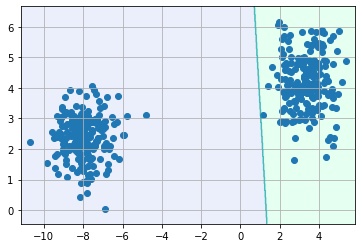

In [111]:
x1Max = max(np.array(ds0_1[0]))+0.5
x1Min = min(np.array(ds0_1[0]))-0.5
x2Max = max(np.array(ds0_1[1]))+0.5
x2Min = min(np.array(ds0_1[1]))-0.5
xx, yy = np.meshgrid(np.arange(x1Min, x1Max, .02), np.arange(x2Min, x2Max, .02))
z = nn0_1.predict(np.c_[np.ones(xx.ravel().shape),xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, colors= ["springgreen","royalblue"], alpha=0.1)
plt.contour(xx, yy, z, colors=["springgreen","royalblue"], alpha=.1)
plt.scatter(ds0_1[0],ds0_1[1])

In [19]:
import importlib

In [42]:
importlib.reload(perceptron)

<module 'perceptron' from '/home/hp/Desktop/acads/PRML/assignment3/perceptron.py'>

In [15]:
ds1_train = pd.read_csv("train1.csv",header = None)
ds1_test = pd.read_csv("dev1.csv", header=None)
ds1_train.insert(0,"theta",pd.Series(np.ones(len(ds1_train))))
ds1_test.insert(0,"theta",pd.Series(np.ones(len(ds1_test))))
cv, test = train_test_split(ds1_test, test_size = 0.3, random_state = 0)

In [39]:
fil1 = ds1_train[2] == 0. 
fil2 = ds1_train[2] == 1.
ds0_1 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 0. 
fil2 = ds1_train[2] == 2.
ds0_2 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 0. 
fil2 = ds1_train[2] == 3.
ds0_3 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 1. 
fil2 = ds1_train[2] == 2.
ds1_2 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 1. 
fil2 = ds1_train[2] == 3.
ds1_3 = ds1_train.where(fil1 | fil2).dropna()
fil1 = ds1_train[2] == 2. 
fil2 = ds1_train[2] == 3.
ds2_3 = ds1_train.where(fil1 | fil2).dropna()

fil1 = cv[2] == 0. 
fil2 = cv[2] == 1.
cv0_1 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 0. 
fil2 = cv[2] == 2.
cv0_2 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 0. 
fil2 = cv[2] == 3.
cv0_3 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 1. 
fil2 = cv[2] == 2.
cv1_2 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 1. 
fil2 = cv[2] == 3.
cv1_3 = cv.where(fil1 | fil2).dropna()
fil1 = cv[2] == 2. 
fil2 = cv[2] == 3.
cv2_3 = cv.where(fil1 | fil2).dropna()

fil1 = test[2] == 0. 
fil2 = test[2] == 1.
test0_1 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 0. 
fil2 = test[2] == 2.
test0_2 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 0. 
fil2 = test[2] == 3.
test0_3 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 1. 
fil2 = test[2] == 2.
test1_2 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 1. 
fil2 = test[2] == 3.
test1_3 = test.where(fil1 | fil2).dropna()
fil1 = test[2] == 2. 
fil2 = test[2] == 3.
test2_3 = test.where(fil1 | fil2).dropna()

In [40]:
ds0_1[2] = ds0_1[2].replace([0.,1],[-1,1])
ds0_2[2] = ds0_2[2].replace([0.,2],[-1,1])
ds0_3[2] = ds0_3[2].replace([0.,3],[-1,1])
ds1_2[2] = ds1_2[2].replace([1,2],[-1,1])
ds1_3[2] = ds1_3[2].replace([1,3],[-1,1])
ds2_3[2] = ds2_3[2].replace([2,3],[-1,1])


cv0_1[2] = cv0_1[2].replace([0.,1],[-1,1])
cv0_2[2] = cv0_2[2].replace([0.,2],[-1,1])
cv0_3[2] = cv0_3[2].replace([0.,3],[-1,1])
cv1_2[2] = cv1_2[2].replace([1,2],[-1,1])
cv1_3[2] = cv1_3[2].replace([1,3],[-1,1])
cv2_3[2] = cv2_3[2].replace([2,3],[-1,1])

test0_1[2] = test0_1[2].replace([0.,1],[-1,1])
test0_2[2] = test0_2[2].replace([0.,2],[-1,1])
test0_3[2] = test0_3[2].replace([0.,3],[-1,1])
test1_2[2] = test1_2[2].replace([1,2],[-1,1])
test1_3[2] = test1_3[2].replace([1,3],[-1,1])
test2_3[2] = test2_3[2].replace([2,3],[-1,1])

No. of correctly classified data points in 0th epoch :  365
No. of correctly classified data points in 1th epoch :  399
No. of correctly classified data points in 2th epoch :  400
Convergence reached in 2 epochs


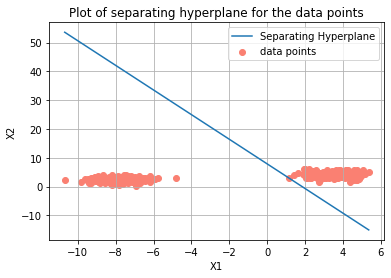

In [55]:
nn0_1 = Perceptron(ds0_1)
params0_1 = nn0_1.train()
nn0_1.plot_separating_hyperplane()

In [56]:
nn0_1.accuracy(test0_1)

1.0

In [57]:
nn0_1.accuracy(cv0_1)

1.0

In [67]:
nn = Perceptron(ds2_3,learning_rate = 100)
nn.train()

No. of correctly classified data points in 0th epoch :  395
No. of correctly classified data points in 1th epoch :  400
Convergence reached in 1 epochs


In [65]:
nn1 = Perceptron(ds2_3,learning_rate = 0.01)
nn1.train()

No. of correctly classified data points in 0th epoch :  369
No. of correctly classified data points in 1th epoch :  400
Convergence reached in 1 epochs


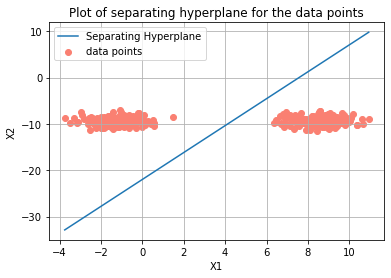

In [66]:
nn1.plot_separating_hyperplane()

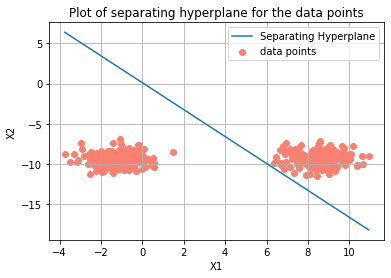

In [68]:
nn.plot_separating_hyperplane()

In [79]:
def hyperparameter_testing(train_dat, cv_dat):
    eta_range = [0.001,0.005,0.01,0.05,0.1,1,5,10,100]
    acc_train = []
    acc_cv = []
    for eta in eta_range:
        model = Perceptron(train_dat,learning_rate = eta)
        model.train()
        acc_train.append(model.accuracy(train_dat))
        acc_cv.append(model.accuracy(cv_dat))
    dictionary = {"Hyperparameter": eta_range, "Training Accuracy":acc_train,"CV Accuracy":acc_cv}
    df = pd.DataFrame(dictionary)
    max_val = np.argmax(np.array(acc_cv))
    print("Maximum accuracy on CV is achieved for the learning rate value: " , eta_range[max_val])
    return(df)

In [88]:
tab_01 = hyperparameter_testing(ds0_1,cv0_1)
tab_01.to_csv("acc_01.csv")

Maximum accuracy on CV is achieved for the learning rate value:  0.001


In [141]:
nn0_1 = Perceptron(ds0_1,learning_rate = 0.01)
nn0_1.train()
#print(nn0_1.accuracy(test0_1))
#nn0_1.confusionMatrix(ds0_1, name = "train")

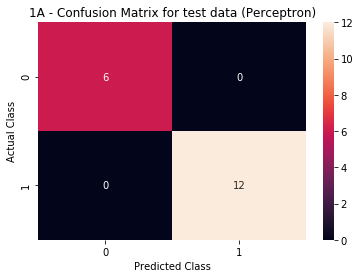

In [86]:
nn0_1.confusionMatrix(test0_1, name = "test")

In [144]:
import warnings
warnings.filterwarnings("ignore")

No handles with labels found to put in legend.


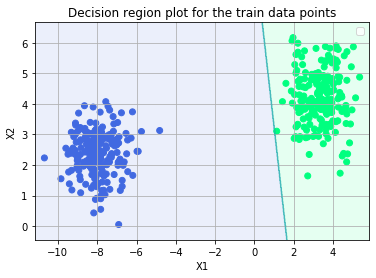

In [145]:
nn0_1.plot_decision_region(name = "train")

In [155]:
tab_02 = hyperparameter_testing(ds0_2,cv0_2)
tab_02.to_csv("acc_02.csv")
tab_02

Maximum accuracy on CV is achieved for the learning rate value:  0.001


,Hyperparameter,Training Accuracy,CV Accuracy
0,0.001,1.0,1.0
1,0.005,1.0,1.0
2,0.010,1.0,1.0
3,0.050,1.0,1.0
4,0.100,1.0,1.0
5,1.000,1.0,1.0
6,5.000,1.0,1.0
7,10.000,1.0,1.0
8,100.000,1.0,1.0


1.0


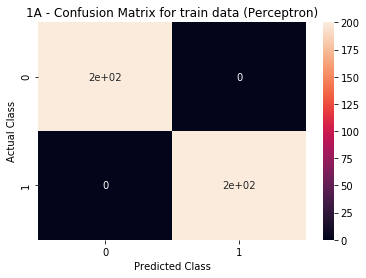

In [156]:
nn0_2 = Perceptron(ds0_2)
nn0_2.train()
print(nn0_2.accuracy(test0_2))
nn0_2.confusionMatrix(ds0_2, name = "train")

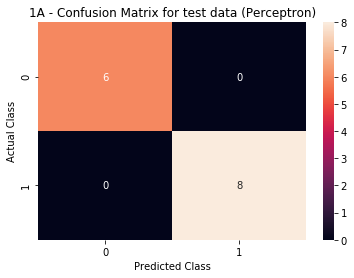

In [157]:
nn0_2.confusionMatrix(test0_2, name = "test")

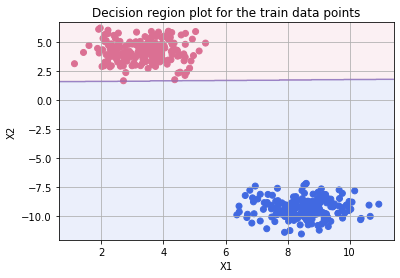

In [158]:
nn0_2.plot_decision_region(name = "train")

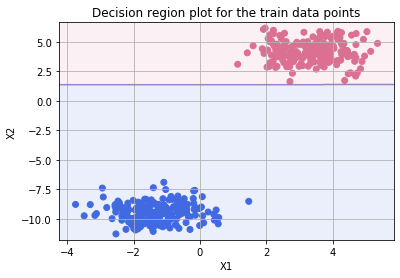

In [159]:
nn0_3 = Perceptron(ds0_3)
nn0_3.train()
nn0_3.plot_decision_region(name = "train")

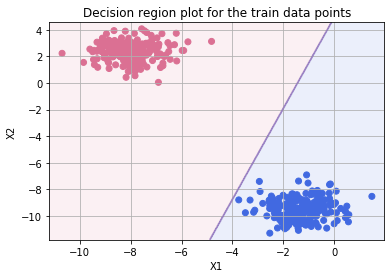

In [161]:
nn1_3 = Perceptron(ds1_3)
nn1_3.train()
nn1_3.plot_decision_region(name = "train")

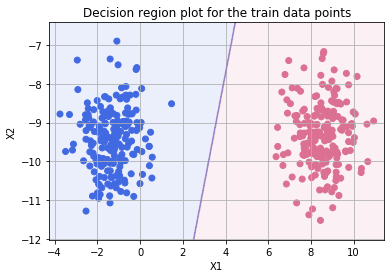

In [162]:
nn2_3 = Perceptron(ds2_3)
nn2_3.train()
nn2_3.plot_decision_region(name = "train")

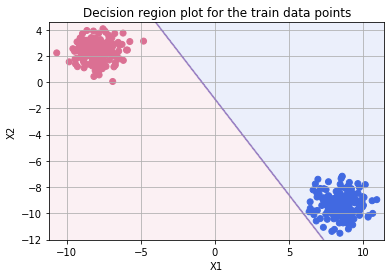

In [163]:
nn1_2 = Perceptron(ds1_2)
nn1_2.train()
nn1_2.plot_decision_region(name = "train")